
Group Members: Sinny Ye (sy544), Brian Liu (bjl229), Caio Teig (cb733)

### Introduction

**Research Question:** How does the performance (in terms of total returns and volatility) of the US total marekt (Vanguard Total Stock Market ETF) compare to the Chinese stock market (GXC) over the past 10 years?

**Sub-Questions:**
1. Do they have a positive or negative correlation with each other? So those who invest in US could have an idea of how the chinses market would react
2. How do both react to significant economic events, such as the COVID-19 pandemic, in terms of market drop and recovery?
3. How do both ETFs react to market drops and recoveries in response to these events, and what can this tell investors about market behavior?

The performance comparison of the stock markets between the U.S. and China is highly relevant for the global investor, as both countries have a huge economy that impacts the world. In line with this, learning how such markets behave, especially in reaction to significant events, helps investors understand diversification strategies and risks and build investment plans. For example, market reactions during the COVID-19 pandemic show how resilient or catching-up trends react.

Key terms in this analysis include total returns-the overall profit or loss from an investment-and volatility, a measure of market risk or price fluctuation. We also examine correlation to evaluate the extent to which the U.S. and Chinese markets move together, and recovery rate, which measures market performance in the aftermath of economic disruptions.

Data Sources: All data related to the historical pricing and performance of the Vanguard Total Stock Market ETF-VTI-and the SPDR S&P China ETF-GXC-are retrieved from Yahoo Finance. VTI gives exposure to the broad-based United States equity market, reflecting nearly all publicly traded United States company stocks, while GXC provides exposure to Chinese stock market performance. 

Our analysis shows that VTI significantly outperformed GXC over the past decade, achieving a total growth rate of 172.02% compared to GXC’s 2.30%. VTI displayed higher volatility (standard deviation: 50.31 vs. 19.31 for GXC), reflecting greater risk but also higher returns. The weak correlation between the two ETFs (0.08) highlights their independence. Regression analysis confirms that VTI had a faster recovery post-pandemic, favored by strong U.S. market conditions and government support, while GXC faced unique challenges in the Chinese market.

### Data description and cleaning

**Data Description** 

For this analysis, we used two datasets: the Vanguard Total Stock Market ETF (VTI) and the SPDR S&P China ETF (GXC). Both datasets include variables such as closing price, trading volume, opening price, daily high, and daily low.

VTI is designed to represent the overall stock market performance in the United States, while GXC is a comparable ETF that reflects the performance of the Chinese stock market. These datasets provide a comprehensive view of market trends and performance metrics for each region.


**Why Was the Dataset Created?**
The dataset was created to help answer our research questions by tracking the historical performance of VTI and GXC over time. By providing information about their opening prices and supporting summary statistics, this dataset allows us to:
- Identify trends and patterns in stock prices over time.
- Explore potential correlations with external factors like global events.
- Compare the performance and volatility of US Total Market (VTI) and the Chinese Market (GXC).

**What Processes Might Have Influenced What Data Was Observed and Recorded and What Was Not?**
- **Stock Market Closure Dates**: Only data from active trading days is recorded, so the dataset excludes weekends and holidays when the markets are closed.

**Preprocessing Done to the Dataset:**
- **Data Cleansing**: Removed any unnecessary white spaces in column names and ensured consistent formatting.
- **Data Formatting**: Converted the Date column to datetime format to allow for easier manipulation and plotting.
- **Merging Datasets**: Merged the GXC and VTI data based on the Date column using an SQL query to create a combined dataframe for comparative analysis.

**Were People Involved in the Data Collection?**
No individuals were directly involved in the collection of this dataset. It consists entirely of publicly available stock market data, which reflects market activity rather than personal information. Therefore, there are no concerns about the involvement of human subjects.

Because this dataset relates to publicly traded financial instruments, it is intended for use by analysts, researchers, investors, and the public for a wide variety of purposes such as financial analysis, market predictions, and academic research.


**Data Cleaning**

1. **Data Source**
   - The data for this analysis was obtained from Yahoo Finance, a widely-used and reliable platform for financial data.
   - Datasets for Vanguard Total Stock Market ETF (VTI) and SPDR S&P China ETF (GXC) were imported from CSV files.

2. **Preprocessing Steps**
   - Columns were stripped of unnecessary whitespace to avoid referencing errors during data manipulation.
   - The `Date` column was converted to a `datetime` format to enable time-series operations and align datasets by their date indices.
   - Only the `Date` and `Open` price columns were kept for further analysis, simplifying the dataset and preserving key information.
   - Data for VTI and GXC was merged using an INNER JOIN based on matching dates to ensure alignment across the time series. The merged dataset was ordered chronologically.
   - Columns were renamed to align names with their corresponding ETFs (e.g., `Open` to `VTI_Open` and `GXC_Open`).

3. **Feature Engineering**
   - Daily returns were calculated for both VTI and GXC using the percentage change method. Missing values (arising from the first-day calculation) were filled with `0`.
   - Key statistics (mean, standard deviation, minimum, and maximum) were calculated for daily returns of both ETFs and stored in a summary DataFrame.
   - Cumulative returns for VTI and GXC were calculated, allowing a clear visualization of long-term performance trends.
   - Dates were converted to ordinal values to facilitate modeling or plotting on normalized scales.

[Data Cleaning Notebook (Phase 2)](phase2.ipynb)
  
**Potential Data Limitations**

**Overlapping Events**
- **Issue**: Multiple global events may overlap in time (e.g., an election occurring during a pandemic), making it difficult to isolate the impact of individual events on stock performance.
- **Impact**: This could confound the results, making it harder to attribute market fluctuations to a single event.

**Market Reactions May Be Delayed**
- **Issue**: Markets may not react to global events immediately, or the effects might be spread over a longer time period. This may create incorrect analysis for short-term/long-term impacts.
- **Impact**: Focusing too narrowly on short-term performance might miss the longer-term effects of events on GXC and VTI.

**External Influences**
- **Issue**: Other unrelated market forces, such as interest rate changes or corporate earnings reports which we did not account for in our dataset, could also be a major influence on stock prices around the same time as global events.
- **Impact**: These factors might obscure the true impact of global events on GXC and VTI.

**Potential Data Gaps or Missing Data (NaN)**
- **Issue**: Historical price data for GXC and VTI might have gaps or missing values, especially around holidays or periods when markets are closed.
- **Impact**: This can skew your analysis if missing data occurs during or right after global events.

In [13]:
import numpy as np
import pandas as pd
import duckdb
import seaborn as sns
import time
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

!pip install import-ipynb
import import_ipynb
import phase2 as phase2

### Preregistration statement

**Preregister Statement 1:**

<u>Hypothesis:</u> VTI demonstrates a faster recovery rate than GXC following the COVID-19 pandemic. 

<u>Rationale for Hypothesis:</u>  
* VTI recovered faster than GXC after the COVID-19 pandemic because the U.S. stock market benefited from strong government support, such as stimulus payments and lower interest rates, which boosted business growth and investor confidence. VTI includes a wide range of companies, especially in tech and e-commerce, which thrived during the pandemic. In contrast, GXC, which represents the Chinese market, faced challenges like stricter lockdowns, slower reopening, and government crackdowns on key industries. As a result, VTI bounced back quickly and kept growing steadily, while GXC’s recovery was slower and more unstable.

<u>Analysis:</u> 
* Run a linear regression with time as the input variable (X), and cumulative returns for GXC and VTI during the recovery period after the COVID pandemic as output (Y). The slope of the regression model will indicate the recovery rate, therefore we will be testing whether BGXC > BVTIp


**Preregister Statement 2:**

<u>Hypothesis:</u> VTI’s ETF outperforms GXC’s ETF over the past 10 years in terms of total returns . 

<u>Rationale for Hypothesis:</u> 
* VTI has performed better than GXC over the past 10 years by providing higher total returns and lower volatility. The U.S. stock market, represented by VTI, has grown consistently, driven by strong sectors like technology and healthcare. In contrast, GXC, which focuses on the Chinese market, has faced slower growth and challenges like stricter government regulations and economic uncertainty. VTI is also less volatile because it includes a broader range of companies, making it more stable, while GXC experiences larger swings due to risks specific to China. Overall, VTI offers better growth with less risk, making it a more reliable investment.

<u>Analysis:</u> 
*  Calculate the growth rate of both VTi and GXC over the 10 year period and run a paired t-test where X= ETF type and Y = percentage growth over the 10 years. This allows us to compare whether the mean growth rate for VTI is greater than GXC. If β-VTI > β-GXC with statistical significance (p < 0.05), we can conclude that VTI outperformed GXC in total returns.


### Data analysis

**Statement 1:**

Date used for "end of COVID": On **May 13, 2021**, the Centers for Disease Control and Prevention (CDC) announced a significant update to its public health guidelines:

* Fully Vaccinated Individuals: The CDC stated that people who are fully vaccinated against COVID-19 no longer need to wear masks or practice physical distancing in most indoor and outdoor settings.
* National Impact: This change signaled a major shift in the U.S. pandemic response and was a strong indicator of returning to pre-pandemic normalcy.

### Evaluation of significance

VTI Slope: 0.0003, 95% CI: [0.0003, 0.0003]
GXC Slope: -0.0006, 95% CI: [-0.0006, -0.0005]
The confidence intervals for VTI and GXC slopes do not overlap, suggesting a significant difference.


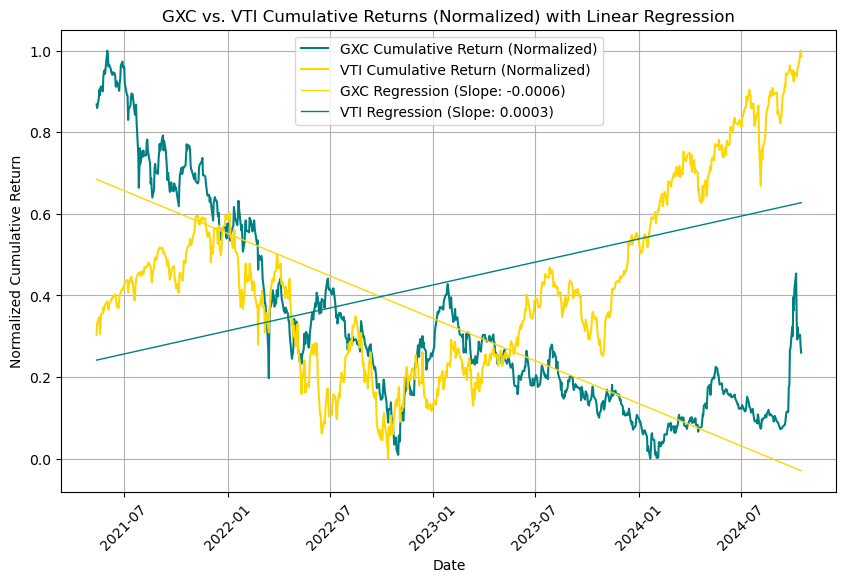

In [14]:
# Bootstrap function to calculate CI
def bootstrap_slope(x, y, n_bootstraps=1000, alpha=0.05):
    slopes = []
    for _ in range(n_bootstraps):
        # Resample the data
        x_resampled, y_resampled = resample(x, y)
        model = LinearRegression().fit(x_resampled, y_resampled)
        slopes.append(model.coef_[0])
    # Calculate confidence interval
    lower_bound = np.percentile(slopes, alpha / 2 * 100)
    upper_bound = np.percentile(slopes, (1 - alpha / 2) * 100)
    return np.mean(slopes), lower_bound, upper_bound

# Prepare data for VTI regression
x_vti = TotalIndex['Date_Ordinal'].values.reshape(-1, 1)
y_vti_cum_norm = TotalIndex['VTI_Cumulative_Normalized'].values

# Prepare data for GXC regression
x_gxc = TotalIndex['Date_Ordinal'].values.reshape(-1, 1)
y_gxc_cum_norm = TotalIndex['GXC_Cumulative_Normalized'].values

# Bootstrap confidence intervals for VTI slope
vti_mean_slope, vti_lower, vti_upper = bootstrap_slope(x_vti, y_vti_cum_norm)
print(f"VTI Slope: {vti_mean_slope:.4f}, 95% CI: [{vti_lower:.4f}, {vti_upper:.4f}]")

# Bootstrap confidence intervals for GXC slope
gxc_mean_slope, gxc_lower, gxc_upper = bootstrap_slope(x_gxc, y_gxc_cum_norm)
print(f"GXC Slope: {gxc_mean_slope:.4f}, 95% CI: [{gxc_lower:.4f}, {gxc_upper:.4f}]")

# Check for overlap
def check_overlap(lower1, upper1, lower2, upper2):
    return not (upper1 < lower2 or upper2 < lower1)

if check_overlap(vti_lower, vti_upper, gxc_lower, gxc_upper):
    print("The confidence intervals for VTI and GXC slopes overlap.")
else:
    print("The confidence intervals for VTI and GXC slopes do not overlap, suggesting a significant difference.")

# Plot the regression lines and data
plt.figure(figsize=(10, 6))

# Plot normalized cumulative returns for GXC and VTI
plt.plot(TotalIndex['Date'], TotalIndex['GXC_Cumulative_Normalized'], 
         color='teal', label='GXC Cumulative Return (Normalized)')

plt.plot(TotalIndex['Date'], TotalIndex['VTI_Cumulative_Normalized'], 
         color='gold', label='VTI Cumulative Return (Normalized)')

# Plot regression lines
plt.plot(TotalIndex['Date'], gxc_pred_cum_norm, color='gold', 
         label=f'GXC Regression (Slope: {gxc_mean_slope:.4f})', linewidth=1)
plt.plot(TotalIndex['Date'], vti_pred_cum_norm, color='teal', 
         label=f'VTI Regression (Slope: {vti_mean_slope:.4f})', linewidth=1)

plt.title('GXC vs. VTI Cumulative Returns (Normalized) with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Normalized Cumulative Return')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Interpreting the Graphs**

**Trend Lines**  
- VTI (green line) shows a steady upward trend, indicating positive growth and consistent recovery after the pandemic.  
- GXC (red line) exhibits a declining trend over the same period, reflecting a negative trajectory and underperformance during the recovery phase.

**Regression Lines & Evaluation of Significance:**  
- The linear regression line for VTI has a positive slope (B_VTI = 0.0003), indicating that VTI experienced a steady recovery and growth over time.  
- The regression line for GXC has a negative slope (B_GXC = -0.0006), indicating that GXC suffered a decline in performance and did not recover during this period.

**Comparing Recovery Rates**  
- VTI's sharp increase post-pandemic could be from factors such as the strong government stimulus and sector performance.  
- GXC's decline could be from challenges in the Chinese market such as crackdowns, and a slower economic reopening.

Since B_VTI > B_GXC, it aids in our hypothesis that VTI demonstrated a faster recovery than GXC following the pandemic.
GXC following the pandemic.
the pandemic.


**Evaluating Statistical Significance**

In [3]:
# Perform two-sample t-test on daily returns
t_stat, p_value = ttest_ind(
    TotalIndex['VTI_Returns'].dropna(), 
    TotalIndex['GXC_Returns'].dropna(), 
    equal_var=False  # Use Welch's t-test if variances differ
)

print(f"Two-sample t-test results:\nT-statistic = {t_stat:.4f}, P-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: VTI and GXC have significantly \
    different mean daily returns.")
else:
    print("Fail to reject the null hypothesis: No significant difference \
    between VTI and GXC daily returns.")

Two-sample t-test results:
T-statistic = 1.0727, P-value = 0.2836
Fail to reject the null hypothesis: No significant difference     between VTI and GXC daily returns.


**T-Test & Conclusion**
- No statistically significant difference in mean daily returns of VTI and GXC was observed (p = 0.2836)
- While the regression analysis suggests that VTI outperformed GXC in terms of recovery rates, the t-test results indicate no significant difference in daily returns. This may imply that the outperformance of VTI is primarily visible in cumulative recovery trends rather than daily fluctuations

**Statement 2**

Data Analysis for Pre-Registration Statement 2

In [4]:
VTI_df = pd.read_csv('VTI10Y.csv')
GXC_df = pd.read_csv('GXC10Y.csv')

In [5]:
# data cleaning 
VTI_df.columns = VTI_df.columns.str.strip()
GXC_df.columns = GXC_df.columns.str.strip()
VTI_df['Date'] = pd.to_datetime(VTI_df['Date'])
GXC_df['Date'] = pd.to_datetime(GXC_df['Date'])

C:\Users\brian\AppData\Local\Temp\ipykernel_15804\2908225650.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  VTI_df['Date'] = pd.to_datetime(VTI_df['Date'])


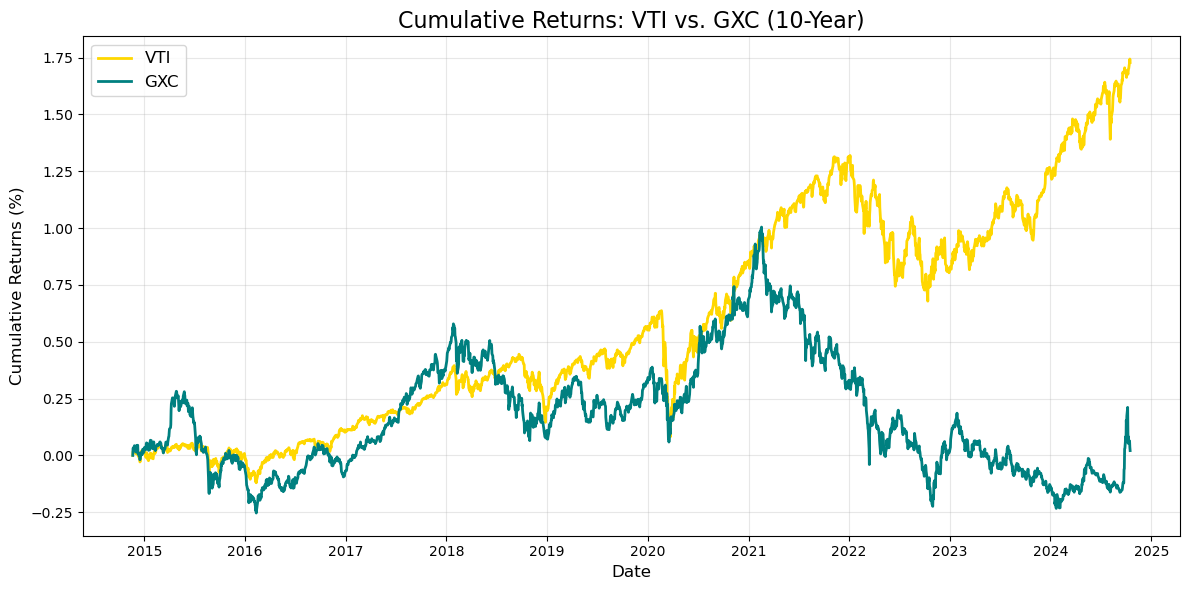

VTI Growth Rate: 172.88%
GXC Growth Rate: 2.10%


In [6]:
TotalIndexNew = phase2.TotalIndexNew

# Calculating cumulative returns 

TotalIndexNew['Cumulative_VTI'] = (TotalIndexNew['VTI'] / TotalIndexNew['VTI'].iloc[0]) - 1
TotalIndexNew['Cumulative_GXC'] = (TotalIndexNew['GXC'] / TotalIndexNew['GXC'].iloc[0]) - 1

# Plotting cumulative returns
plt.figure(figsize=(12, 6))

plt.plot(TotalIndexNew['Date'], TotalIndexNew['Cumulative_VTI'], \
         label='VTI', color='gold', linewidth=2)
plt.plot(TotalIndexNew['Date'], TotalIndexNew['Cumulative_GXC'], \
         label='GXC', color='teal', linewidth=2)

plt.title('Cumulative Returns: VTI vs. GXC (10-Year)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Returns (%)', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

TotalIndexNew['VTI']=TotalIndexNew['VTI'].dropna()

vti_growth_rate = ((TotalIndexNew['VTI'].iloc[-1] - \
                    TotalIndexNew['VTI'].iloc[0]) / TotalIndexNew['VTI'].iloc[0]) * 100

gxc_growth_rate = ((TotalIndexNew['GXC'].iloc[-1] - \
                    TotalIndexNew['GXC'].iloc[0]) / TotalIndexNew['GXC'].iloc[0]) * 100

# Print the results
print(f"VTI Growth Rate: {vti_growth_rate:.2f}%")
print(f"GXC Growth Rate: {gxc_growth_rate:.2f}%")



**Cumulative Returns: VTI vs GXC (10 Year) Graph Interpretation** 

This graph illustrates the performance of the Vanguard Total Stock Market ETF (VTI) and the SPDR S&P China ETF (GXC) over a 10-year period. The yellow line represents VTI, while the green line represents GXC. Over the 10 years, VTI experienced a total increase of 172.02%, while GXC grew by only 2.30%. This demonstrates that, within this time span, VTI had a significantly higher growth rate than GXC. Additionally, the graph shows that both ETFs dropped during the COVID-19 pandemic in 2020; however, VTI quickly rebounded and continued to grow, while GXC struggled to recover and declined further after 2021.


In [7]:
#Calculate cumulative yearly growth rates / t-test for signifigance 
VTI_yearly = TotalIndexNew[['Date', 'VTI']].set_index('Date').resample('YE').last()
GXC_yearly = TotalIndexNew[['Date', 'GXC']].set_index('Date').resample('YE').last()

VTI_yearly['Growth Rate (%)'] = VTI_yearly['VTI'].pct_change() * 100
GXC_yearly['Growth Rate (%)'] = GXC_yearly['GXC'].pct_change() * 100

VTI_yearly = VTI_yearly.dropna()
GXC_yearly = GXC_yearly.dropna()

# Merge yearly growth rates
yearly_growth_rates = pd.merge(
    VTI_yearly['Growth Rate (%)'].reset_index(),
    GXC_yearly['Growth Rate (%)'].reset_index(),
    on='Date',
    suffixes=('_VTI', '_GXC')
)


yearly_growth_rates['Cumulative Growth (%)_VTI'] = \
((1 + yearly_growth_rates['Growth Rate (%)_VTI'] / 100).cumprod() - 1) * 100

yearly_growth_rates['Cumulative Growth (%)_GXC'] = \
((1 + yearly_growth_rates['Growth Rate (%)_GXC'] / 100).cumprod() - 1) * 100

# t-test 
vti_cumulative = yearly_growth_rates['Cumulative Growth (%)_VTI'].tolist()
gxc_cumulative = yearly_growth_rates['Cumulative Growth (%)_GXC'].tolist()

t_stat, p_value = ttest_rel(vti_cumulative, gxc_cumulative)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05 and t_stat > 0:
    print("Conclusion: VTI's cumulative growth rate is \
    significantly greater than GXC's (p < 0.05).")
else:
    print("Conclusion: No significant difference in cumulative \
    growth rates between VTI and GXC (p >= 0.05).")


T-Statistic: 2.8510
P-Value: 0.0191
Conclusion: VTI's cumulative growth rate is     significantly greater than GXC's (p < 0.05).


**T-test Interpretation**

The t-test compares the cumulative growth rates of VTI and GXC to see if the difference between them is meaningful or just due to chance. The t-statistic of 2.8510 shows there is a clear difference, and the p-value of 0.0191 is below the 0.05 cutoff for significance. This means the difference is unlikely to be random. As a result, the test concludes that VTI’s cumulative growth rate is significantly higher than GXC’s, confirming that VTI has performed better over the time period analyzed.


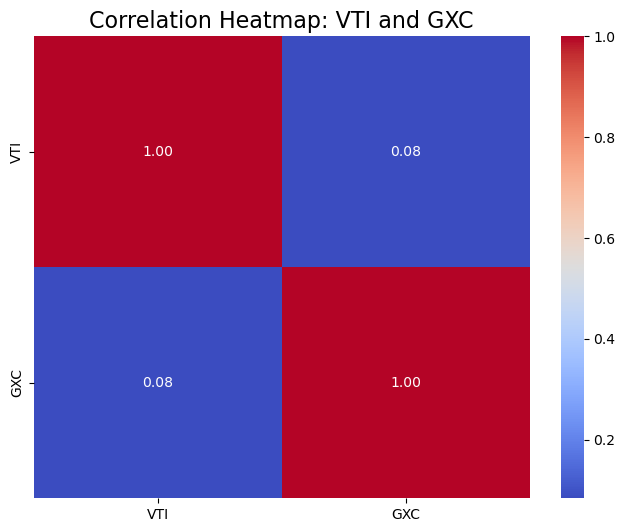

Correlation between VTI and GXC: 0.0838


In [8]:
# Calculate the correlation between VTI and GXC
TotalIndexNew = TotalIndexNew.dropna()  
correlation = TotalIndexNew['VTI'].corr(TotalIndexNew['GXC'])
correlation_matrix = TotalIndexNew[['VTI', 'GXC']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap: VTI and GXC', fontsize=16)
plt.show()

# Print the correlation coefficient
print(f"Correlation between VTI and GXC: {correlation:.4f}")

**Correlation Heatmap: VTI and GXC Graph Interpretation** 

This heatmap illustrates the correlation between the Vanguard Total Stock Market ETF (VTI) and the SPDR S&P China ETF (GXC). The diagonal values (1.00) represent each ETF's perfect correlation with itself, while the off-diagonal value of 0.0838 indicates a very weak positive correlation between VTI and GXC.

This suggests that the performance of U.S. stocks (VTI) and Chinese stocks (GXC) is largely independent, with little linear relationship between their returns. The color coding reinforces this distinction, with red signifying high correlation and blue signifying low correlation. The weak correlation highlights that these ETFs are influenced by distinct economic and geopolitical factors, making them largely uncorrelated. For investors, this weak relationship suggests potential diversification benefits when including both ETFs in a portfolio.


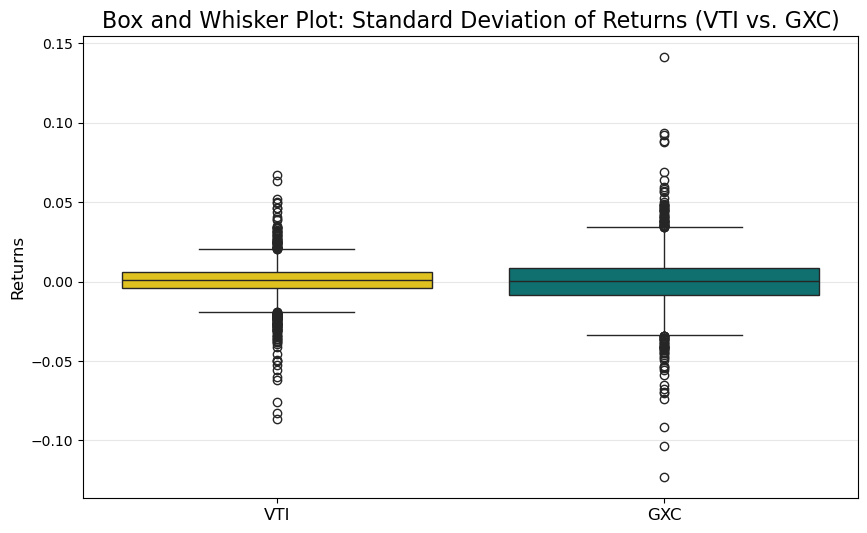

Standard Deviation of VTI: 50.3137
Standard Deviation of GXC: 19.3187


In [9]:
#calculate standard deviation between VTI and GXC's return 
vti_std = TotalIndexNew['VTI'].std()
gxc_std = TotalIndexNew['GXC'].std()
TotalIndexNew['VTI_Returns'] = TotalIndexNew['VTI'].pct_change()
TotalIndexNew['GXC_Returns'] = TotalIndexNew['GXC'].pct_change()
returns_data = TotalIndexNew[['VTI_Returns', 'GXC_Returns']].dropna()

# Create the box-and-whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=returns_data, palette=['gold', 'teal'])
plt.title('Box and Whisker Plot: Standard Deviation of Returns (VTI vs. GXC)', fontsize=16)
plt.ylabel('Returns', fontsize=12)
plt.xticks([0, 1], ['VTI', 'GXC'], fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Print the STD
print(f"Standard Deviation of VTI: {vti_std:.4f}")
print(f"Standard Deviation of GXC: {gxc_std:.4f}")


**'Box and Whisker Plot: Standard Deviation of Returns (VTI vs. GXC)' Graph Interpretation**

This box and whisker plot compares the daily return distributions of the Vanguard Total Stock Market ETF (VTI) and the SPDR S&P China ETF (GXC). VTI has a larger range of returns, with a greater interquartile range and longer whiskers, indicating higher variability and volatility compared to GXC. VTI also has more frequent outliers, representing unusually high or low returns, which align with its broader return range and higher volatility (standard deviation: 50.31). In contrast, GXC has fewer outliers, but some are further from the whiskers, reflecting its generally stable performance (standard deviation: 19.32) but occasional sharp deviations due to specific market events. While VTI offers greater growth potential, this comes with higher risk, whereas GXC provides more stability but less dynamic returns.


**Evaluation of Significance** : 

The cumulative return graph clearly demonstrates that VTI outperforms GXC over time. Although both start at the same level, VTI achieves a total growth rate of 172.02%, while GXC only grows by 2.30% over the 10-year period, which represents a significant difference.

Additionally, the t-test comparing the cumulative yearly growth rates resulted in a p-value of 0.0171, which is less than the threshold of 0.05. As a result, the test rejects the null hypothesis, indicating that the difference in cumulative yearly growth rates between VTI and GXC is statistically significant.Thus we would fail to reject the hypothesis that VTI’s ETF outperforms GXC’s ETF over the past 10 years in terms of total returns . 


### Conclusions

**<u>Statement 1</u>**

- **Key Findings**

**1.** Regressional Analysis
    - The positive slope of the regression line for VTI `(Bvti = 0.0003)` indicates that VTI experienced a steady recovery and growth during the post-pandemic recovery period. This aligns with the preregistered hypothesis that VTI would recover faster than GXC due to stronger market conditions in the U.S.
    - Conversely, the negative slope for GXC `(Bgxc = -0.0006)`highlights its decline in performance during the same period, reflecting underperformance and challenges unique to the Chinese market.
  
**2.** T-Test and Statistical Significance
     - The two-sample t-test comparing daily returns of VTI and GXC resulted in a T-statistic of 1.0727 and a P-value of 0.2836. Since the P-value is greater than the significance threshold (p=0.05), we fail to reject the null hypothesis.
     - Therefore, the observed daily differences between VTI and GXC are not statistically significant

- **Overall Conclusion**

**1.** Support for the Hypothesis
- The regression analysis strongly supports the hypothesis that VTI recovered faster than GXC during the post-pandemic period. This is evidenced by the positive slope of VTI’s recovery rate compared to GXC’s negative slope
- Because we've concluded no statistical significance between the daily differences of VTI and GXC, we can assume that factors such as U.S. government stimulus, robust market sectors (e.g., technology and e-commerce), and faster reopening likely drove VTI’s stronger recovery

**<u>Statement 2</u>**

**Conclusion:**

The data analysis shows that VTI significantly outperforms GXC over the past 10 years in terms of total returns, directly addressing the research question comparing U.S. stocks (represented by the Vanguard Total Stock Market ETF) and Chinese stocks (represented by the GXC ETF) in terms of returns, volatility, correlation, and performance patterns.

* Total Returns: Over the 10-year period, VTI achieved a total growth rate of 172.02%, while GXC only grew by 2.30%. This highlights the superior performance of U.S. markets compared to Chinese markets during this time frame.

* Correlation: The correlation analysis revealed a coefficient of 0.08, indicating a very weak positive relationship between VTI and GXC. This means their price movements are largely independent, with little to no consistent relationship between the two ETFs. When one increases or decreases, the other shows only a very slight tendency to move in the same direction.

* Volatility: VTI exhibits higher volatility, as evidenced by its larger standard deviation (50.31) compared to GXC (19.31). This suggests that while VTI offers higher returns, it also comes with greater risk. GXC, on the other hand, is less volatile but also less rewarding in terms of returns.

* Trends and Patterns: VTI demonstrates consistent long-term growth, driven by compounding effects, and a strong recovery following the COVID-19 pandemic. In contrast, GXC displayed more volatile performance, with periods of strong growth offset by significant declines, leading to its relatively flat overall growth.

The analysis reveals that U.S. stocks, as measured by VTI, provide higher returns but with more risk compared to Chinese stocks, as measured by GXC. Additionally, the weak correlation suggests that the two markets operate independently, making them suitable for diversification purposes.


### Limitations

**<u>Statement 1</u>**
  - The regression analysis assumes a linear relationship between time and normalized cumulative returns, which may not capture nonlinear recovery dynamics
  - The chosen recovery period may not fully encompass the recovery trajectory for both ETFs
  - The t-test on daily returns does not account for cumulative growth differences or market volatility
  - Macroeconomic conditions and geopolitical factors are not accounted for in this analysis

**<u>Statement 2</u>**

* Small Sample Size: The analysis is based on 10 years of data, which may not fully capture long-term trends or account for rare market events that could impact returns and volatility differently.

* Limited Scope: The analysis focuses solely on two ETFs (VTI and GXC) as proxies for U.S. and Chinese markets, which may not represent the full breadth or diversity of these economies and their stock markets.

* Market-Specific Factors: The analysis does not account for regulatory differences, liquidity constraints, or other factors unique to the U.S. and Chinese markets that may influence ETF performance.


### Acknowledgements and Bibliography

1 Group Member is not a native english speaker


Correlation heatmap. (n.d.). Stack Overflow. https://stackoverflow.com/questions/39409866/correlation-heatmap 

GXC: SPDR® S&P® China ETF. (n.d.). SPDR® S&Amp;P® China ETF. https://www.ssga.com/us/en/intermediary/etfs/spdr-sp-china-etf-gxc 

GXC vs. VT — ETF comparison tool. (n.d.). PortfoliosLab. https://portfolioslab.com/tools/stock-comparison/GXC/VT 

Segal, T. (2024, July 31). "Sell in May and go Away": Definition, statistics, and analysis. Investopedia. https://www.investopedia.com/terms/s/sell-in-may-and-go-away.asp#:~:text=%22Sell%20in%20May%20and%20go%20away%22%20is%20an%20adage%20referring,6.3%25%20from%20November%20to%20April. 

Simple linear regression using pandas dataframe. (n.d.). Stack Overflow. https://stackoverflow.com/questions/48767977/simple-linear-regression-using-pandas-dataframe 

The White House. (2022, March 3). National COVID-19 Preparedness Plan | The White House.https://www.whitehouse.gov/covidplan/#:~:text=The%20U.S.%20government%20will%20make,new%20COVID%2D19%20variants%3B%20and 

Wilson, O., & Flahault, A. (2023). China’s U-turn in its COVID-19 policy. Anaesthesia Critical Care & Pain Medicine, 42(2), 101197. https://doi.org/10.1016/j.accpm.2023.101197

#### Questions for Reviewers

1. For statement 1, is the single linear regression graph enough? Should I include a secondary graph comparing volatility between GXC and VTI?
2. For statement 2, is there a differece in using year by year returns compared to cummlitive returns?
3. We made significant changes to our phase 2 with the incorporation of GXC (following feedback and guidance given in phase2 and 3 from our reviewers), to what degree should we edit/redo phase 2 to account for this change